In [1]:
import os
os.chdir('C:/Users/Vipul k Dhiman/Desktop')
os.getcwd()

'C:\\Users\\Vipul k Dhiman\\Desktop'

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import Natural Language Tool-Kit 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords  
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
import re
import time
from tqdm import tqdm
import random

[nltk_data] Downloading package stopwords to C:\Users\Vipul k
[nltk_data]     Dhiman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
df = pd.read_csv('train.csv', low_memory = False)

In [6]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.describe

<bound method NDFrame.describe of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

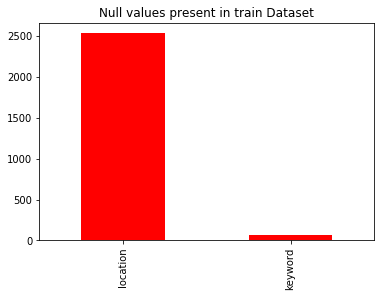

In [12]:
## Exploratory Data Analysis

# Missing Value Graphical Representation
missing = df.isnull().sum()
missing[missing>0].sort_values(ascending=False).plot(kind='bar',title='Null values present in train Dataset', color=['red'])

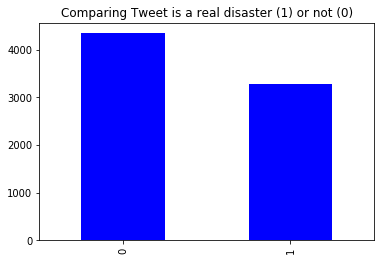

In [13]:
# Target (Real or Fake) Graphical Representation
df['target'].value_counts().plot(kind='bar', title='Comparing Tweet is a real disaster (1) or not (0)',color=['blue'])

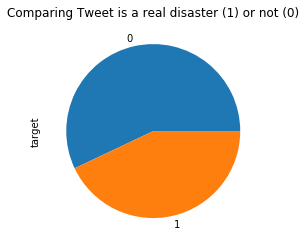

In [14]:
df['target'].value_counts().plot(kind = 'pie', title='Comparing Tweet is a real disaster (1) or not (0)')

In [15]:
# Let's use groupby to use describe by label
df.groupby('target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4342.0  5276.446338  3157.206802  23.0  2513.25  5243.5  8038.5   
1       3271.0  5661.608071  3097.094809   1.0  3104.50  5676.0  8252.0   

                 
            max  
target           
0       10848.0  
1       10873.0

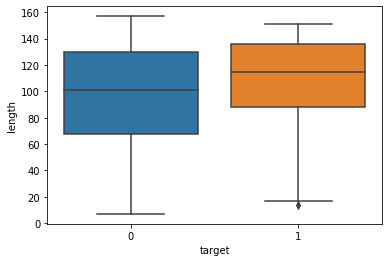

In [17]:
# Adding a Length Column
df['length'] = df['text'].apply(len)
# Comparison of text length in tweets
sns.boxplot(x="target", y="length", data = df)
plt.show()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

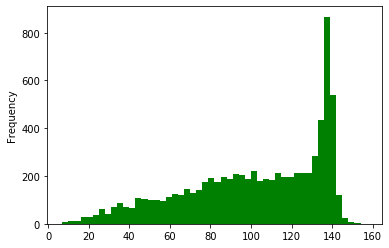

In [18]:
df['length'].plot(bins=50, kind='hist', color='green')
df.length.describe()

In [19]:
# Extracting the lengthiest tweet
df[df['length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBA582D508>,
      dtype=object)

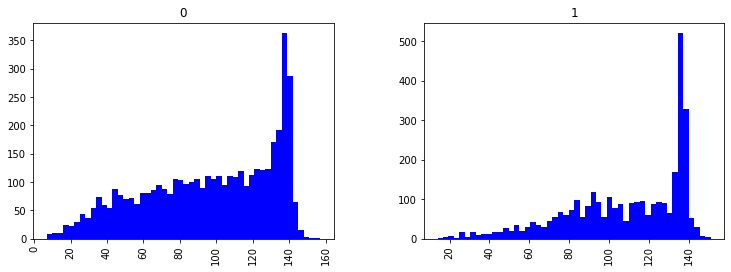

In [20]:
# let's see if message length is a distinguishing feature between the target
df.hist(column='length', by='target', bins=50,figsize=(12,4), color='blue')

In [21]:
# Total of 221 unique keywords
df.keyword.nunique()

221

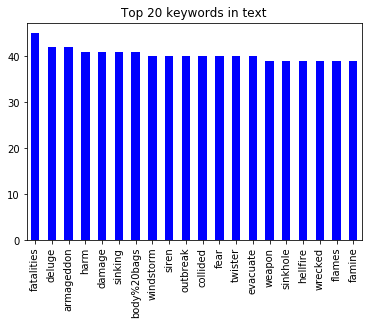

In [22]:
# Top 20 Keywords in the text
df.keyword.value_counts()[:20].plot(kind='bar', title='Top 20 keywords in text', color='blue')

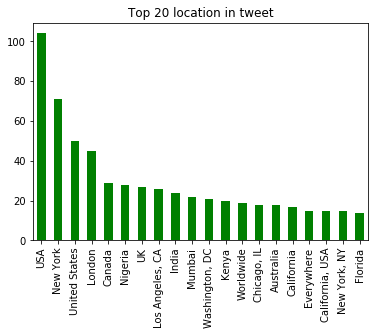

In [23]:
# Check the top 20 locations
df.location.value_counts()[:20].plot(kind='bar', title='Top 20 location in tweet', color='green')

In [24]:
# Missing Value Imputation
for Col_Name in df.columns:
    if(df[Col_Name].dtype == object):
        Impute_Value = df[Col_Name].mode()[0]
        df[Col_Name] = df[Col_Name].fillna(Impute_Value)

df.isnull().sum() # Cross-Check

id          0
keyword     0
location    0
text        0
target      0
length      0
dtype: int64

In [25]:
# Word Cloud
STOPWORDS.add('https')  # remove htps to the word Cloud

def Plot_word(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

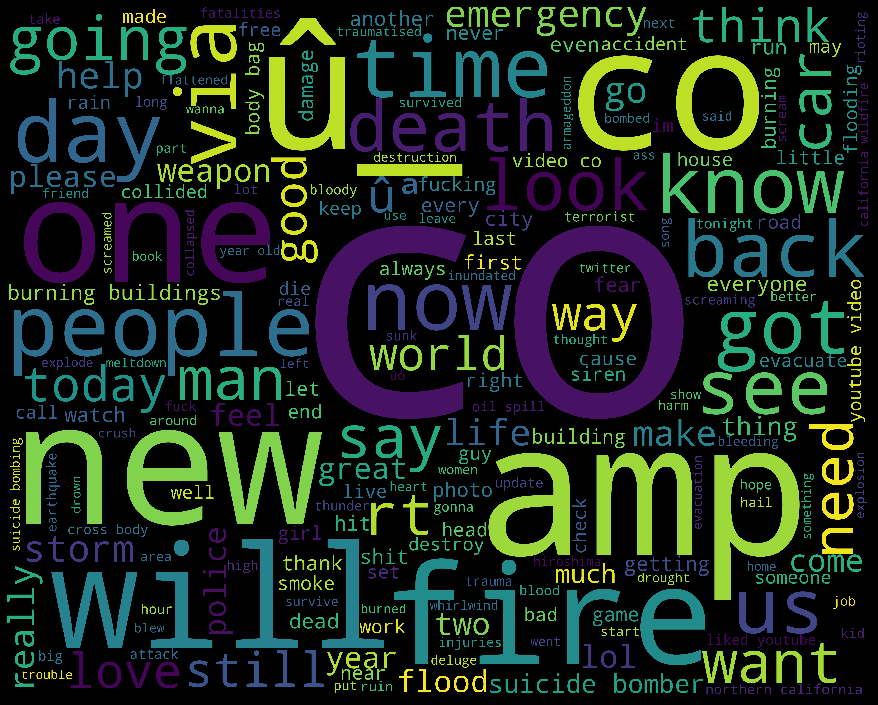

In [26]:
# Apply it on the whole dataset 'text' values
text = df.text.values
Plot_word(text)

In [27]:
# How many http words does this text have...
df.loc[df['text'].str.contains('http')].target.value_counts()

pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

def remove_html(text):
    no_html= pattern.sub('',text)
    return no_html

# Remove all text that start with html
df['text']=df['text'].apply(lambda x : remove_html(x))

In [28]:
# lets check if this clean works
df.loc[df['text'].str.contains('http')].target.value_counts()

0    1
Name: target, dtype: int64

In [29]:
# Now remove stopwords, pass to lower & add delimiter
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  

    text = text.lower()  

    # split to array(default delimiter is " ") 
    text = text.split()  
    
    text = [w for w in text if not w in set(stopwords.words('english'))] 

    text = ' '.join(text)    
            
    return text

In [30]:
text = df.text[3]
print(text)

13,000 people receive #wildfires evacuation orders in California 


In [31]:
clean_text(text)

'people receive wildfires evacuation orders california'

In [32]:
# Apply clean_text on the whole dataset 
df['text'] = df['text'].apply(lambda x : clean_text(x))

In [33]:
# How many unique words does this text have...
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count

text_values = df["text"]
counter = counter_word(text_values)

print(f"The len of unique words is: {len(counter)}")
list(counter.items())[:10]

The len of unique words is: 16070


[('deeds', 2),
 ('reason', 20),
 ('earthquake', 50),
 ('may', 89),
 ('allah', 9),
 ('forgive', 2),
 ('us', 128),
 ('forest', 66),
 ('fire', 254),
 ('near', 56)]

In [34]:
## Train-Test Split

# The most frequent words used
vocab_size = len(counter)
embedding_dim = 32

# Max number of words in each complaint.
max_length = 20
trunc_type='post'
padding_type='post'

# oov_took its set for words out our word index
oov_tok = "<XXX>"
training_size = 6090
seq_len = 12

# Based in 80% of the data
training_sentences = df.text[0:training_size]
training_labels = df.target[0:training_size]

testing_sentences = df.text[training_size:]
testing_labels = df.target[training_size:]

print('The Shape of training ',training_sentences.shape)
print('The Shape of testing',testing_sentences.shape)

The Shape of training  (6090,)
The Shape of testing (1523,)


In [35]:
# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

# Lets see the first 10 elements
print("THe first word Index are: ")

for x in list(word_index)[0:15]:
    print (" {},  {} ".format(x,  word_index[x]))
 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(df.text[1])
print(training_sequences[1])

THe first word Index are: 
 <XXX>,  1 
 amp,  2 
 like,  3 
 fire,  4 
 get,  5 
 via,  6 
 new,  7 
 people,  8 
 news,  9 
 emergency,  10 
 one,  11 
 disaster,  12 
 body,  13 
 video,  14 
 burning,  15 
forest fire near la ronge sask canada
[74, 4, 120, 571, 5480, 5481, 1184]


In [36]:
training_padded[1628]

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [37]:
# Model Building
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tensorflow.keras.layers.Bidirectional(tensorflow.keras.layers.LSTM(64)),
    tensorflow.keras.layers.Dense(14, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid')  # remember this is a binary clasification
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            514240    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 14)                1806      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 15        
Total params: 565,725
Trainable params: 565,725
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Convert into Arrays
training_labels = np.asarray(training_labels)
testing_labels = np.asarray(testing_labels)

Train on 6090 samples, validate on 1523 samples
Epoch 1/15
6090/6090 [==============================] - 21s 3ms/sample - loss: 0.5637 - accuracy: 0.7016 - val_loss: 0.4771 - val_accuracy: 0.7787
Epoch 2/15
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.2917 - accuracy: 0.8908 - val_loss: 0.5171 - val_accuracy: 0.7328
Epoch 3/15
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.1681 - accuracy: 0.9433 - val_loss: 0.5690 - val_accuracy: 0.7288
Epoch 4/15
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.1186 - accuracy: 0.9635 - val_loss: 0.7158 - val_accuracy: 0.7190
Epoch 5/15
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.0930 - accuracy: 0.9695 - val_loss: 0.8800 - val_accuracy: 0.7190
Epoch 6/15
6090/6090 [==============================] - 8s 1ms/sample - loss: 0.0842 - accuracy: 0.9734 - val_loss: 0.6713 - val_accuracy: 0.7275
Epoch 7/15
6090/6090 [==============================] - 9s 1ms/sample - los

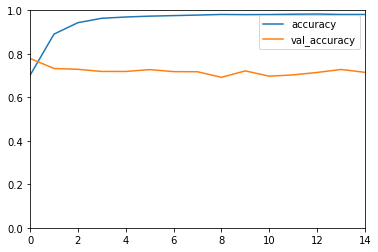

In [40]:
# Epochs
start_time = time.time()
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

final_time = (time.time()-start_time)/60
print(f'The time in minutes: {final_time}')

model_loss = pd.DataFrame(model.history.history)
model_loss.head()

model_loss[['accuracy','val_accuracy']].plot(ylim=[0,1]);

In [41]:
# Predictions
predictions = model.predict_classes(testing_padded)

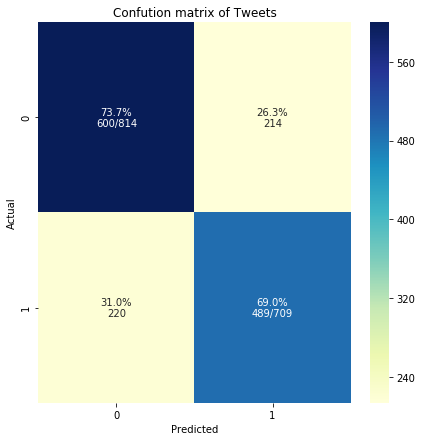

In [42]:
# Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(testing_labels,predictions, 'Confution matrix of Tweets', figsize=(7,7))